# Imports necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, interp1d

# Datos dados en el ejercicio

In [2]:
baseImponible = 5000000

In [3]:
basesImponibles = np.array([
                            4410000, 
                            4830000, 
                            5250000, 
                            5670000
                        ])

cuotasIntegra = np.array([
                            1165978, 
                            1329190, 
                            1501474, 
                            1682830
                        ])

tipos = np.array([
                    0.3886, 
                    0.4102, 
                    0.4318, 
                    0.4534
                ])

# Cálculos para el Tipo

In [4]:
# Interpolación Lineal
marg1 = interp1d(basesImponibles, tipos, kind='linear', fill_value='extrapolate')

#Interpolación Cuadrática
marg2 = interp1d(basesImponibles, tipos, kind='quadratic', fill_value='extrapolate')

# Interpolación Cúbica
marg3 = CubicSpline(basesImponibles, tipos)


# Cálculos para la Cuota Integra

In [5]:
# Interpolación Lineal
cuotaIntegraInterLineal = interp1d(basesImponibles, cuotasIntegra, kind='linear')
lineales = np.array(list(map(lambda x: cuotaIntegraInterLineal(x), basesImponibles)))

#Interpolación Cuadrática
cuotaIntegraInterCuadra = interp1d(basesImponibles, cuotasIntegra, kind='quadratic')
cuadraticos = np.array(list(map(lambda x: cuotaIntegraInterCuadra(x), basesImponibles)))

# Interpolación Cúbica
cuotaIntegraInterCubica = CubicSpline(basesImponibles, cuotasIntegra)
cubicos = np.array(list(map(lambda x: cuotaIntegraInterCubica(x), basesImponibles)))

# Impresiónes

In [6]:
# Impresión de resultados (tipo marginal calculado y costo final de la cuota)
print("Tipo obtenido con interpolación Lineal: {:.12f}".format(marg1(baseImponible)*100), '%')
print("Tipo obtenido con interpolación Cuadrática: {:.12f}".format(marg2(baseImponible)*100), '%')
print("Tipo obtenido con interpolación Cúbica: {:.12f}".format(marg3(baseImponible)*100), '%')
print("")
print("Cuota obtenida con interpolación Lineal: {:.5f}".format(cuotaIntegraInterLineal(baseImponible)))
print("Cuota obtenida con interpolación Cuadrática: {:.5f}".format(cuotaIntegraInterCuadra(baseImponible)))
print("Cuota obtenida con interpolación Cúbica: {:.5f}".format(cuotaIntegraInterCubica(baseImponible)))


Tipo obtenido con interpolación Lineal: 41.894285714286 %
Tipo obtenido con interpolación Cuadrática: 41.894285714286 %
Tipo obtenido con interpolación Cúbica: 41.894285714286 %

Cuota obtenida con interpolación Lineal: 1398924.00000
Cuota obtenida con interpolación Cuadrática: 1397831.14286
Cuota obtenida con interpolación Cúbica: 1397831.14286


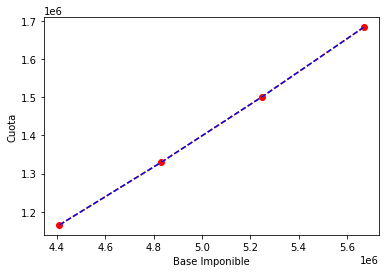

In [7]:
# Labels
plt.xlabel("Base Imponible") # Independiente
plt.ylabel("Cuota") # Dependiente

# Plot de interpolación lineal
plt.plot(basesImponibles, lineales, 'o', color='red', linestyle='--')

# Plot de interpolación cuadrática
plt.plot(basesImponibles, cuadraticos, color='orange', linestyle='--')

# Plot de interpolación cúbica
plt.plot(basesImponibles, cubicos, color='blue', linestyle='--')

# Mostrar gráfico
plt.show()